# Problem Statement
A stock price always fluctuate, but is there a relation between a closing price and its moving averages? <br>
<br>
An analyst wants to showcase how the stock would move, he has 5 years of stock price data with him on which he needs to perform the analysis.

# Objective
Find the possible futuristic movement of the stock "GOOG" based on its price for the last 5 years

# Steps
1. Get 5 Years of data from Finance Package with Ticker Symbol "GOOG"
2. Create 50DMA and 200DMA
3. Plot it with the Actual Price.
4. Basic EDA on the Data.
5. Fit Statsmodel OLS to find the best possible features & its statistical scores

In [1]:
# import libraries
import yfinance as yahooFinance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
google = yahooFinance.Ticker("GOOG")

In [3]:
# 5 years of data
df = google.history("5y")

In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-12 00:00:00-05:00,52.400002,53.075001,52.046398,52.597000,41154000,0.0,0.0
2018-02-13 00:00:00-05:00,52.250000,52.918499,52.204350,52.605000,25302000,0.0,0.0
2018-02-14 00:00:00-05:00,52.447498,53.585999,52.337502,53.485001,31116000,0.0,0.0
2018-02-15 00:00:00-05:00,53.953499,54.573952,53.216999,54.476002,36868000,0.0,0.0
2018-02-16 00:00:00-05:00,54.420502,55.233501,54.415649,54.740002,33590000,0.0,0.0


In [5]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-06 00:00:00-05:00,102.684998,104.699997,102.209999,103.470001,25573000,0.0,0.0
2023-02-07 00:00:00-05:00,103.629997,108.669998,103.547997,108.040001,33738800,0.0,0.0
2023-02-08 00:00:00-05:00,102.690002,103.580002,98.455002,100.000000,73546000,0.0,0.0
2023-02-09 00:00:00-05:00,100.540001,100.610001,93.860001,95.459999,97798600,0.0,0.0
2023-02-10 00:00:00-05:00,95.739998,97.019997,94.529999,94.860001,49269900,0.0,0.0


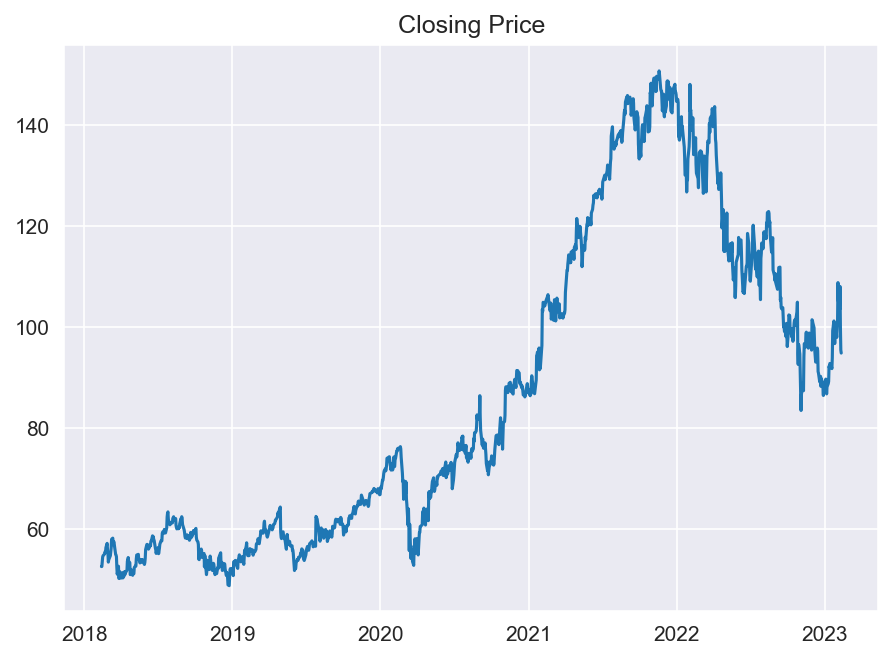

In [6]:
# Overview of closing price before calculating DMAs

sns.set_style("darkgrid")
plt.figure(figsize=(7,5), dpi=150)
plt.title("Closing Price")
plt.plot(df["Close"])

In [7]:
# Callculate 50DMA
df["fiftyDMA"] = df["Close"].rolling(50).mean()

In [8]:
# Calculate 200DMA
df["thDMA"] = df["Close"].rolling(200).mean()

In [11]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,thDMA
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000,1210.000000,1060.000000
mean,86.826872,87.822565,85.890279,86.868102,3.087735e+07,0.0,0.015886,87.336973,88.566590
std,30.986276,31.289926,30.645145,30.955861,1.340495e+07,0.0,0.563660,30.884451,30.333174
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000,52.442220,55.610605
25%,58.999750,59.532249,58.391800,59.102499,2.234500e+07,0.0,0.000000,59.506220,59.988387
50%,75.322502,76.136002,74.827003,75.681999,2.756400e+07,0.0,0.000000,76.421585,75.418296
75%,113.261749,114.805000,112.139000,113.317753,3.527200e+07,0.0,0.000000,113.750300,118.879604
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000,146.183850,139.273730


In [12]:
df.drop(columns=["Dividends", "Stock Splits"], inplace=True)

In [13]:
df.head()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
Date,,,,,,,
2018-02-12 00:00:00-05:00,52.400002,53.075001,52.046398,52.597000,41154000,NaN,NaN
2018-02-13 00:00:00-05:00,52.250000,52.918499,52.204350,52.605000,25302000,NaN,NaN
2018-02-14 00:00:00-05:00,52.447498,53.585999,52.337502,53.485001,31116000,NaN,NaN
2018-02-15 00:00:00-05:00,53.953499,54.573952,53.216999,54.476002,36868000,NaN,NaN
2018-02-16 00:00:00-05:00,54.420502,55.233501,54.415649,54.740002,33590000,NaN,NaN


In [14]:
df.tail()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
Date,,,,,,,
2023-02-06 00:00:00-05:00,102.684998,104.699997,102.209999,103.470001,25573000,94.7242,105.241645
2023-02-07 00:00:00-05:00,103.629997,108.669998,103.547997,108.040001,33738800,94.9086,105.157158
2023-02-08 00:00:00-05:00,102.690002,103.580002,98.455002,100.000000,73546000,94.9566,105.059088
2023-02-09 00:00:00-05:00,100.540001,100.610001,93.860001,95.459999,97798600,94.9408,104.920138
2023-02-10 00:00:00-05:00,95.739998,97.019997,94.529999,94.860001,49269900,94.9292,104.796908


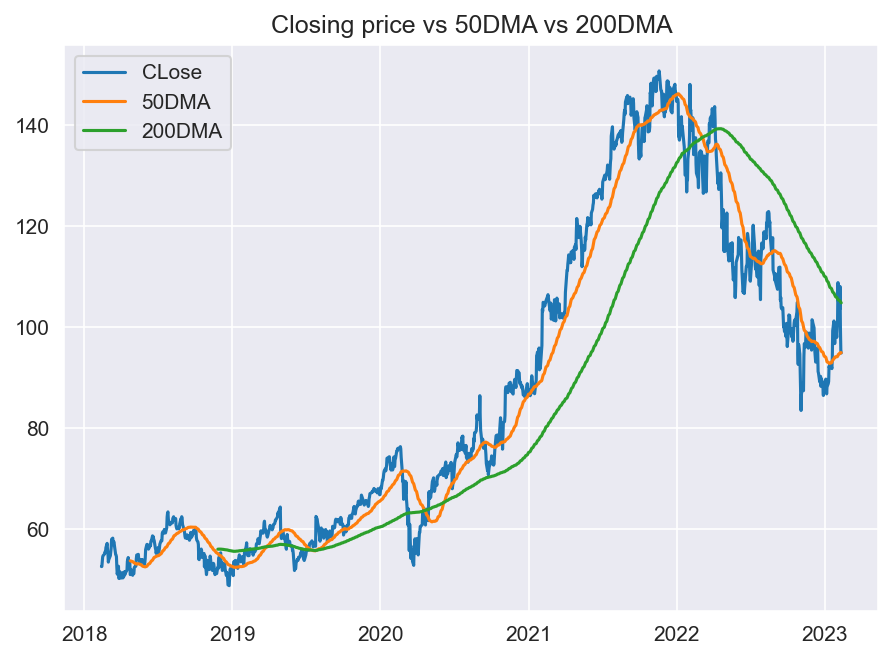

In [15]:
# Plot Closing price vs 50DMA vs 200DMA
sns.set_style("darkgrid")
plt.figure(figsize=(7,5), dpi=150)
plt.title("Closing price vs 50DMA vs 200DMA")
plt.plot(df["Close"], label="CLose")
plt.plot(df["fiftyDMA"], label="50DMA")
plt.plot(df["thDMA"], label="200DMA")
plt.legend()

## Inferences
1. 50DMA and 200DMA are fairly good indicators of how the stock moving.
2. if the closing price is above the 50DMA or 200DMA, it usually on the uptrend or bullish.
3. if the closing price is below the 50DMA or 200DMA, it usually means that it is in the downd trend.
4. Every point where 50DMA and 200DMA intersect, the market usually reverses its trend (High->Low | Low->High)
5. The huge dip at the March 2020 indicates the Covid19 market crash.

## Finding the possible futuristic movement of the stock

In [17]:
# Analyze correlation between each variablesb

<AxesSubplot:>

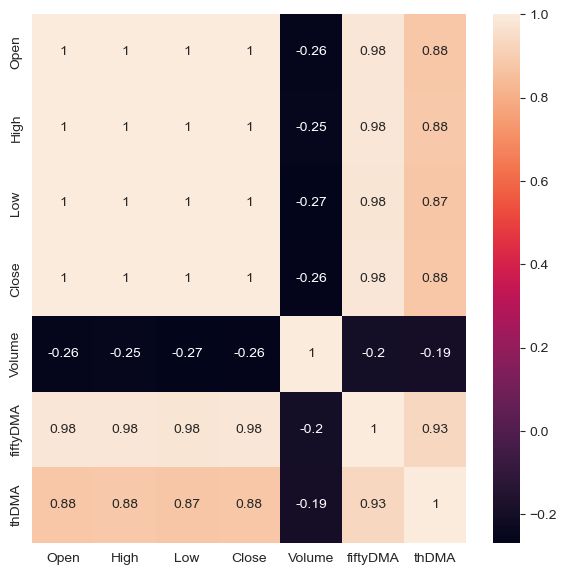

In [18]:
plt.figure(figsize=(7,7), dpi=100)
sns.heatmap(df.corr(), annot=True)

## Inferences
1. Closing price has very High correlation with almost all the variables except the volume.
2. There is strong multi-colinearity between the variables as well.

<AxesSubplot:title={'center':'Displot 50 DMA'}, xlabel='fiftyDMA', ylabel='Density'>

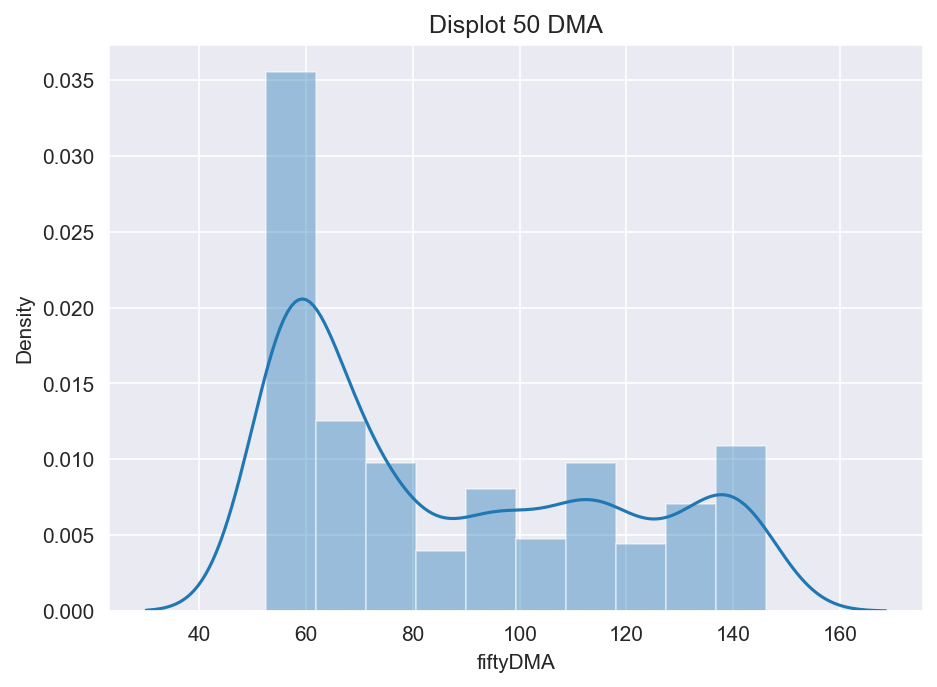

In [22]:
# PLot distplot of 50DMA
sns.set_style("darkgrid")
plt.figure(figsize=(7,5), dpi=150)
plt.title("Displot 50 DMA")
sns.distplot(df["fiftyDMA"])

<AxesSubplot:title={'center':'Displot of Close Price'}, xlabel='Close', ylabel='Density'>

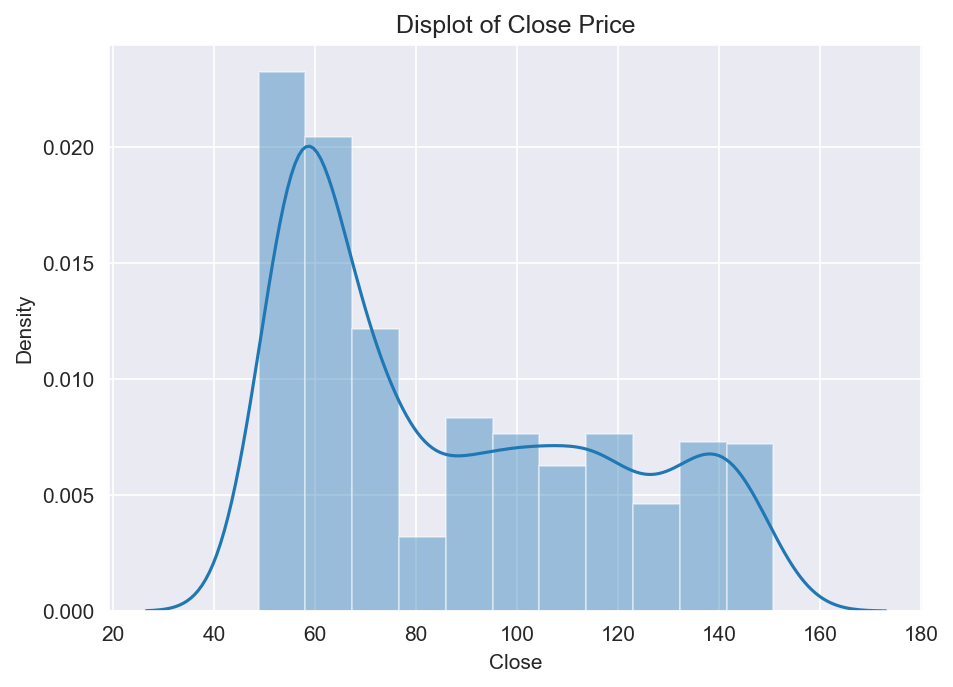

In [23]:
# PLot distplot of close price
sns.set_style("darkgrid")
plt.figure(figsize=(7,5), dpi=150)
plt.title("Displot of Close Price")
sns.distplot(df["Close"])

In [24]:
import statsmodels.formula.api as smf

In [25]:
model = smf.ols(formula="Close ~ fiftyDMA", data=df)
model = model.fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 3.131e+04
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:30:27   Log-Likelihood:                -3872.8
No. Observations:                1210   AIC:                             7750.
Df Residuals:                    1208   BIC:                             7760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6474      0.513      5.162      0.000       1.641       3.654
fiftyDMA       0.9797      0.006    176.955      0.000       0.969       0.991
==============================================================================
Omnibus:                       65.093   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.481
Skew:                          -0.565   Prob(JB):                     4.07e-17
Kurtosis:                       3.467   Cond. No.                         278.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inferences from summary
1. Good r^2 scores and coef.
2. Since they are very highly correlated (~1), it isn't wise to fit the model based on the parameters in real life.

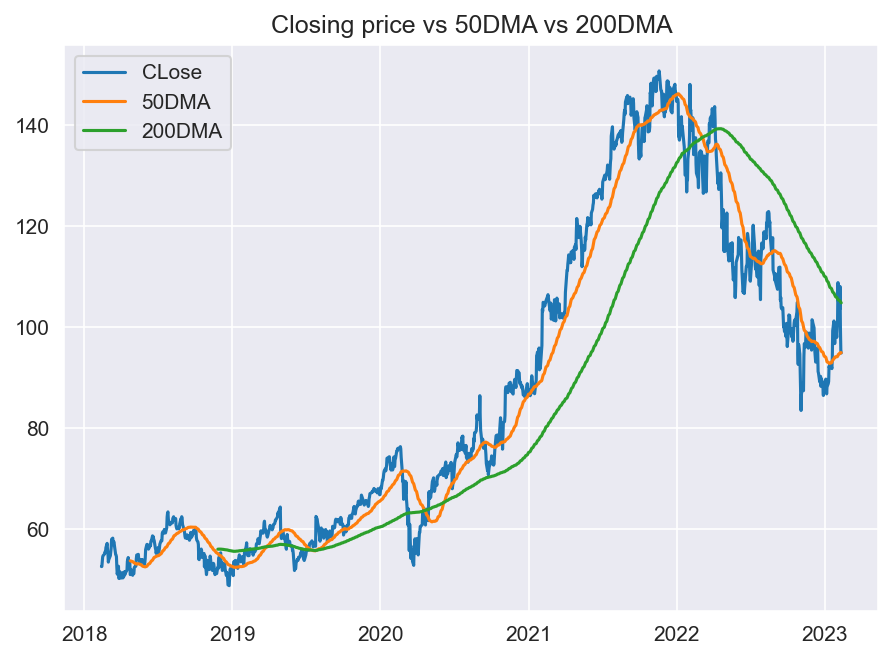

In [27]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,5), dpi=150)
plt.title("Closing price vs 50DMA vs 200DMA")
plt.plot(df["Close"], label="CLose")
plt.plot(df["fiftyDMA"], label="50DMA")
plt.plot(df["thDMA"], label="200DMA")
plt.legend()